## Gen2 Detector Hits Example

Providing `model` parameters and name, running simulation to produce energy deposition vs. time plot.

The keyword `geomscope`takes three values: `None`, `"Gen2"` and `"IC86"`. `None` is equivalent to `"IC86"`, i.e. the standard IceCube + DeepCore geometry of the detector. For Gen2 we consider the mDOM at the moment. More sensors, such as the LOM will be included soon.

Wavelength shifters (WLS) are currently modeled as a simple scaling of the effective volume and noise rate of the Gen2 sensor (here mDOM). Therefore, we cannot seperately read out the counts of from the WLS and the mDOM but have to run the simulation twice. This will be changed in the future too! To include WLS in the simulation, set `include_wls=True`.

env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


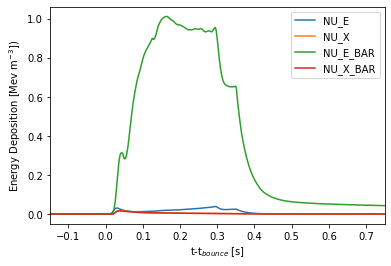

In [1]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA
from asteria.simulation import Simulation
import astropy.units as u

model = {'name': 'Nakazato_2013',
         'param':{
             'progenitor_mass': 13*u.Msun,
             'revival_time': 300 * u.ms,
             'metallicity': 0.004,
             'eos': 'shen'}
         }
sim = Simulation(model=model,
                 distance=10 * u.kpc, 
                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                 tmin=-1*u.s, tmax=1*u.s, dt=1*u.ms,
                 geomscope="Gen2", include_wls=True)
sim.run()

import matplotlib.pyplot as plt
for flavor in sim.flavors:
    plt.plot(sim.time, sim.E_per_V[flavor], label=flavor.name)
plt.legend()
ax = plt.gca()
ax.set(xlabel=r't-t$_{bounce}$ [s]', ylabel='Energy Deposition [Mev m$^{-3}$])', xlim=(-0.15, 0.75));

We first set a time resolution `dt`. Using the `sim.detector_signal()` function we can read out the detector signal for each subdetector class `i3`, `dc` and `md`. Remember that `md` in this case also includes the WLS hits.

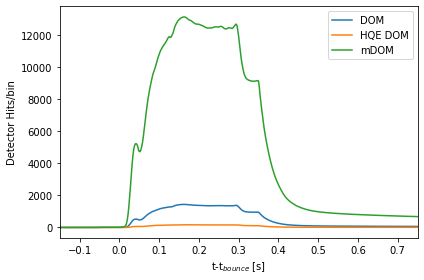

In [2]:
dt = 2 * u.ms
t, sim_i3 = sim.detector_signal(subdetector="i3", dt=dt)
t, sim_dc = sim.detector_signal(subdetector="dc", dt=dt)
t, sim_md = sim.detector_signal(subdetector="md", dt=dt)

fig, ax = plt.subplots(1,1)
ax.plot(t, sim_i3, label = "DOM")
ax.plot(t, sim_dc, label = "HQE DOM")
ax.plot(t, sim_md, label = "mDOM")
ax.set_xlabel(r't-t$_{bounce}$ [s]')
ax.set_ylabel('Detector Hits/bin')
ax.set_xlim(-0.15, 0.75)
ax.legend()

plt.tight_layout()

## Testing with config file

Providing config file. 

ToDo @sgwiswold : fix errors.

In [3]:
import os
base_path = os.environ['ASTERIA']
sim = Simulation(config=os.path.join(base_path, 'data/config/example.ini'))
sim.run()

fig, ax = plt.subplots(1, figsize = (6,7))
for flavor in sim.flavors:
    ax.plot(sim.time, sim.avg_dom_signal(flavor), label=flavor.name)
ax.legend()
ax.set(xlabel=r't-t$_{bounce}$ [s]', ylabel='Signal per DOM', xlim=(-0.025, 0.65));

ValueError: Quantity truthiness is ambiguous, especially for logarithmic units and temperatures. Use explicit comparisons.